# Importing Libraries

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from keras.models import Sequential
from keras.layers import Dense

# Loading DataSet 

In [76]:
claim_data=pd.read_csv("D:\\travel_ins_hackathon\\Train_file.csv")

In [77]:
claim_data

,ID,Age,Agency,Agency Type,Commision (in value),Destination,Distribution Channel,Duration,Gender,Net Sales,Product Name,Claim
0,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.50,Silver Plan,1
1,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.00,Basic Plan,0
2,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NaN,13.00,Cancellation Plan,0
3,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NaN,34.00,Cancellation Plan,0
4,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NaN,39.60,Rental Vehicle Excess Insurance,0
5,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,Online,78,NaN,99.00,Rental Vehicle Excess Insurance,0
6,6217,34,CWT,Travel Agency,23.76,AUSTRALIA,Online,27,NaN,0.00,Rental Vehicle Excess Insurance,0
7,52027,45,JZI,Airlines,9.10,HONG KONG,Online,10,M,26.00,Basic Plan,0
8,24167,32,C2B,Airlines,63.21,SINGAPORE,Online,368,M,252.85,Annual Silver Plan,1
9,19885,59,C2B,Airlines,63.21,SINGAPORE,Online,377,F,252.85,Annual Silver Plan,0


In [78]:
claim_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
ID                      62288 non-null int64
Age                     62288 non-null int64
Agency                  62288 non-null object
Agency Type             62288 non-null object
Commision (in value)    62288 non-null float64
Destination             62288 non-null object
Distribution Channel    62288 non-null object
Duration                62288 non-null int64
Gender                  22713 non-null object
Net Sales               62288 non-null float64
Product Name            62288 non-null object
Claim                   62288 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 5.7+ MB


In [79]:
claim=claim_data.copy()

# Data Insight Report

In [80]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

In [81]:
data_insights_report(claim) # This report gives as view of the data, its metrics and basic actionable Insights

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,ID,int64,50756,0,62288.0,32844.95,18065.42,0.0,17579.0,33446.50,48532.25,63323.00
1,Age,int64,89,0,62288.0,39.67,14.01,0.0,33.0,36.00,43.00,118.00
2,Agency,object,16,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agency Type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Commision (in value),float64,940,0,62288.0,12.83,23.50,0.0,0.0,1.88,14.44,262.76
5,Destination,object,102,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Distribution Channel,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Duration,int64,443,0,62288.0,60.96,114.33,-2.0,10.0,25.00,59.00,4881.00
8,Gender,object,2,39575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Net Sales,float64,1037,0,62288.0,50.72,63.17,-389.0,20.0,29.70,58.00,682.00


# Pre Processing the Data

In [82]:
#percentage of null values
temp_df = claim.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(claim))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(claim)}")
temp_df

The length of dataset is 	 62288


,Column Name,Number of null values,Null values in percentage
0,ID,0,0.000000
1,Age,0,0.000000
2,Agency,0,0.000000
3,Agency Type,0,0.000000
4,Commision (in value),0,0.000000
5,Destination,0,0.000000
6,Distribution Channel,0,0.000000
7,Duration,0,0.000000
8,Gender,39575,63.535512
9,Net Sales,0,0.000000


In [83]:
# to check unique values:
claim.nunique()

ID                      50756
Age                        89
Agency                     16
Agency Type                 2
Commision (in value)      940
Destination               102
Distribution Channel        2
Duration                  443
Gender                      2
Net Sales                1037
Product Name               25
Claim                       2
dtype: int64

                            ID       Age  Commision (in value)  Duration  \
ID                    1.000000  0.003697              0.115840  0.037260   
Age                   0.003697  1.000000              0.080202 -0.003637   
Commision (in value)  0.115840  0.080202              1.000000  0.492882   
Duration              0.037260 -0.003637              0.492882  1.000000   
Net Sales             0.080545  0.021144              0.750256  0.606696   
Claim                 0.144786 -0.039255              0.276378  0.217081   

                      Net Sales     Claim  
ID                     0.080545  0.144786  
Age                    0.021144 -0.039255  
Commision (in value)   0.750256  0.276378  
Duration               0.606696  0.217081  
Net Sales              1.000000  0.344922  
Claim                  0.344922  1.000000  


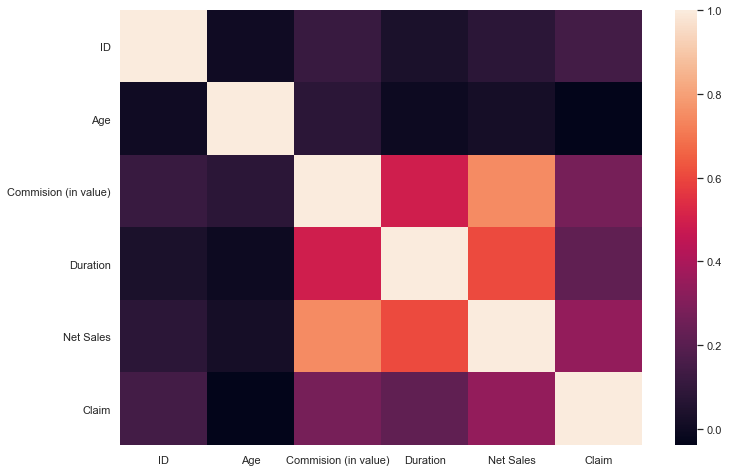

In [84]:
# Finding Corelation
corr = claim.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# Univariate & Bivariate Analysis

## Final Outcome Column :Claim 

In [85]:
sns.set(rc={'figure.figsize':(11.7,8)})

Text(0.5, 1.0, 'Count Plot for Outcome')

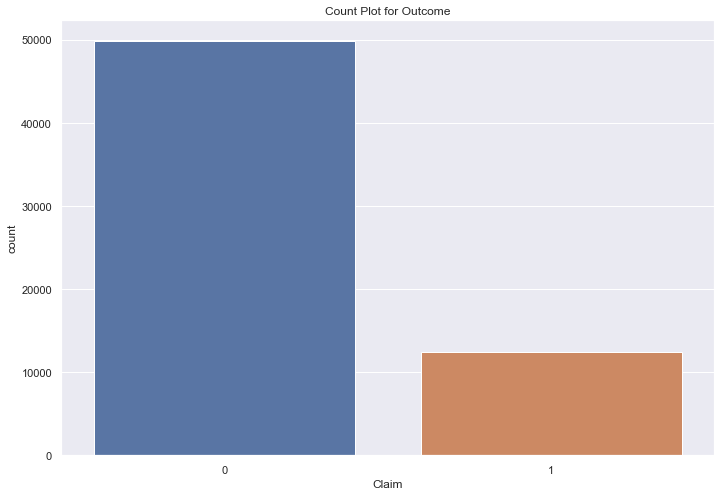

In [86]:
# creating count plot with title using seaborn
sns.countplot(x=claim.Claim)
plt.title("Count Plot for Outcome")

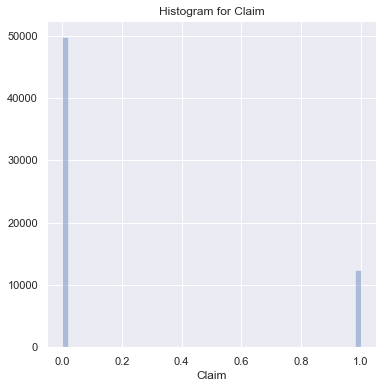

In [87]:
#Histogram to check distribution of "Claim"
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Claim")
sns.distplot(claim.Claim,kde=False)

In [88]:
# Computing the %age of claim-0 and claim-1 in the Dataset
Out1=len(claim[claim.Claim==1])
Out0=len(claim[claim.Claim==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0
print("% of claim(1):",PC_of_1)
print("% of claim(0):",PC_of_0)

% of claim(1): 20.000642178268688
% of claim(0): 79.99935782173131


## Column :Age

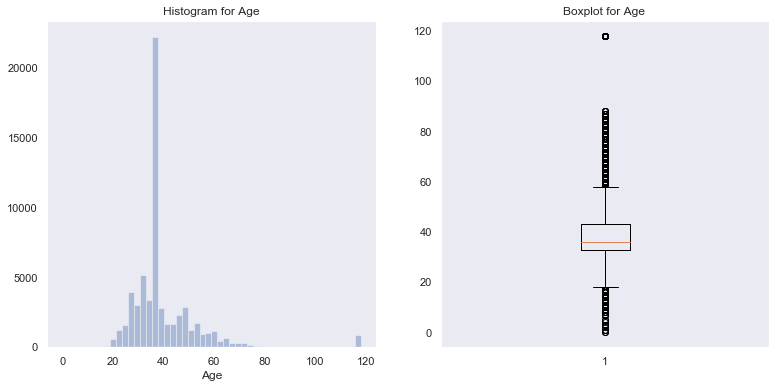

In [89]:
# creating dist plot with Age using seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Age")
sns.distplot(claim.Age,kde=False)
plt.subplot(1,3,2)
plt.boxplot(claim.Age)
plt.title("Boxplot for Age ")
plt.show()

Text(0.5, 1.0, 'Boxplot for  claim by age')

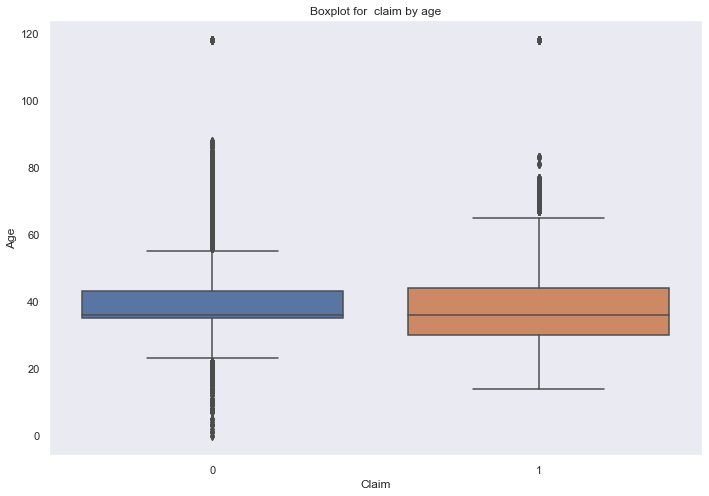

In [90]:
# creating box plot of age & claim using seaborn
plt.subplot(1,1,1)
sns.boxplot(x=claim.Claim,y=claim.Age)
plt.title("Boxplot for  claim by age")

# Inference:
#Age starts from 0 to 118
#maximum Age lies between 30 & 50

In [91]:
claim['Age'].nunique()

89

In [92]:
claim['Age'].unique()

array([ 28,  37,  27,  36,  26,  39,  34,  45,  32,  59,  33,  50,  67,
        55,  47,  41,  43,  35,  46,  51,  53,  22,  40,  24,  29,  38,
        79, 118,  60,  30,  49,  48,  52,  54,  16,  21,  64,  31,  56,
        44,  70,  71,  66,  19,  25,  42,  62,  23,  57,  58,  61,  63,
        77,  74,  65,  20,  73,  84,  68,  72,  69,  81,  76,  82,  17,
        87,   3,  13,  18,  14,  88,  83,  75,  80,   0,  12,   1,   4,
        78,   9,  86,   8,  15,  85,   7,  10,   5,  11,   2])

# Column : Duration

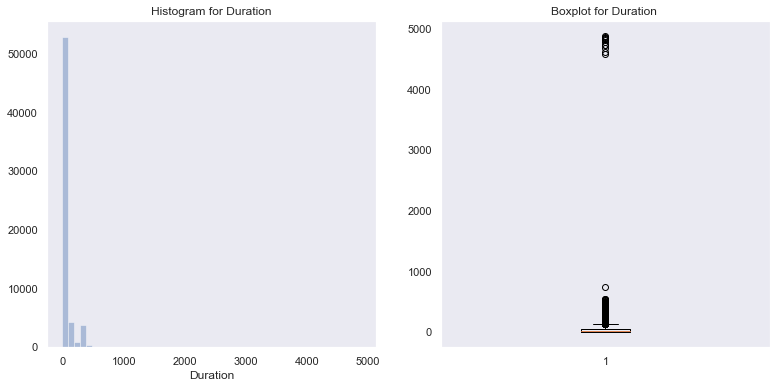

In [93]:
 #creating dist plot with Duration using seaborn
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Duration")
sns.distplot(claim.Duration,kde=False)
plt.subplot(1,3,2)
plt.boxplot(claim.Duration)
plt.title("Boxplot for Duration ")
plt.show()

In [94]:
claim['Duration'].max()

4881

In [95]:
claim['Duration'].min()

-2

Text(0.5, 1.0, 'Boxplot for  claim by Duration')

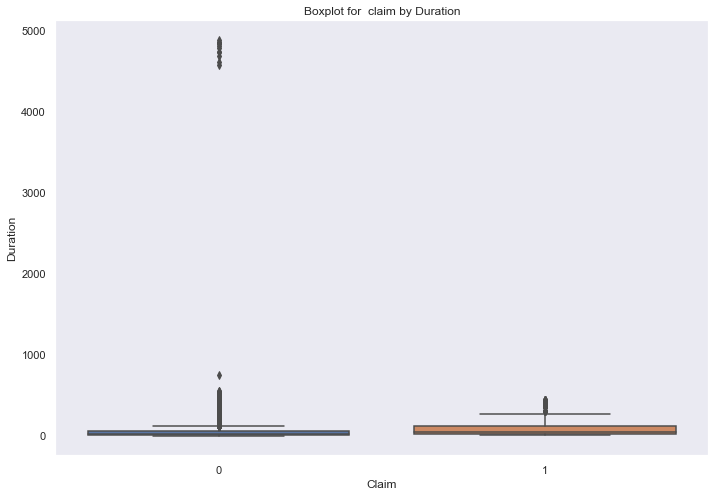

In [96]:
# creating box plot of Duration & claim using seaborn
plt.subplot(1,1,1)
sns.boxplot(x=claim.Claim,y=claim.Duration)
plt.title("Boxplot for  claim by Duration")

In [98]:
claim['Duration'].nunique()

443

# Inference
#Duration is total number of days that person travelled during all his trips 
#Duration lies betwen -2 to 4881 (in days)

# Column: Commision(in value)

In [99]:
claim['Commision (in value)'].head(10)

0    28.13
1    12.95
2     0.00
3     0.00
4    23.76
5    59.40
6    23.76
7     9.10
8    63.21
9    63.21
Name: Commision (in value), dtype: float64

In [100]:
pd.crosstab(index=claim['Commision (in value)'],columns=claim['Claim'])

Claim,0,1
Commision (in value),,
0.00,27926,2619
0.02,10,0
0.04,1,0
0.05,11,0
0.09,11,0
0.11,1,0
0.13,2,0
0.14,3,0
0.15,1,0


Text(0.5, 1.0, 'Boxplot for  claim by Commision in value')

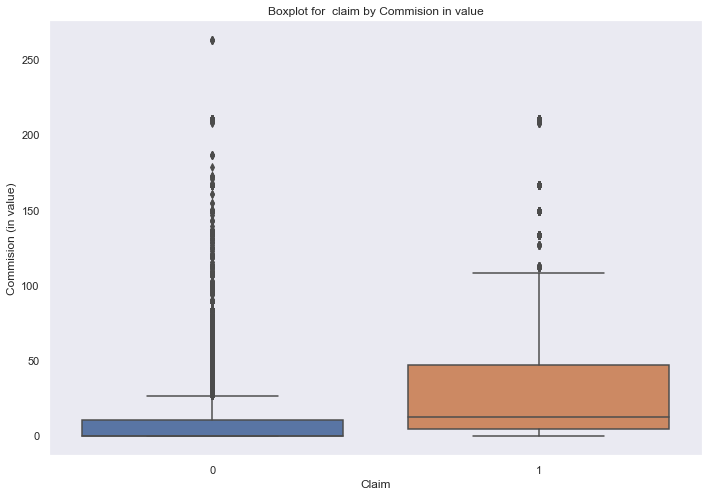

In [101]:
# creating box plot of commision in value & claim using seaborn
plt.subplot(1,1,1)
sns.boxplot(x=claim.Claim,y=claim['Commision (in value)'])
plt.title("Boxplot for  claim by Commision in value")

# Inference
#Commision has outliers because some are teh values which are higher & out of trend

In [102]:
claim['Commision (in value)'].nunique()

940

## Column : Agency

In [103]:
pd.crosstab(index=claim['Agency'],columns=claim['Claim'])

Claim,0,1
Agency,,
ADM,65,0
ART,259,12
C2B,6194,7414
CBH,85,14
CCR,164,47
CSR,62,13
CWT,6796,1160
EPX,27845,2570
JWT,600,39


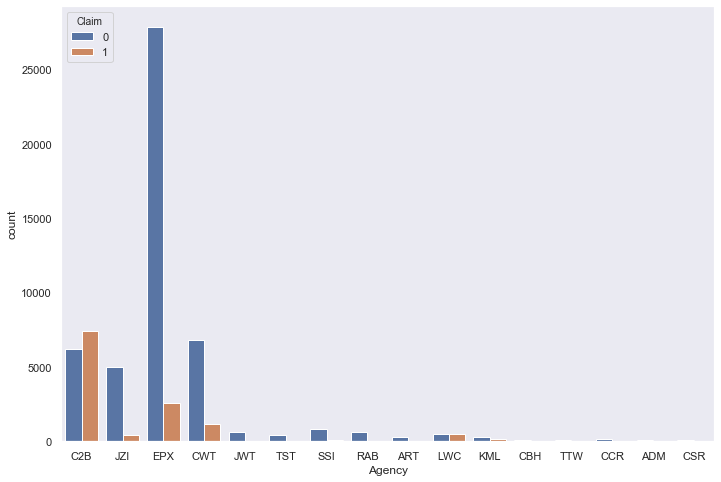

In [42]:
sns.countplot(x=claim['Agency'],hue=claim['Claim'])

# Column: Agency Type

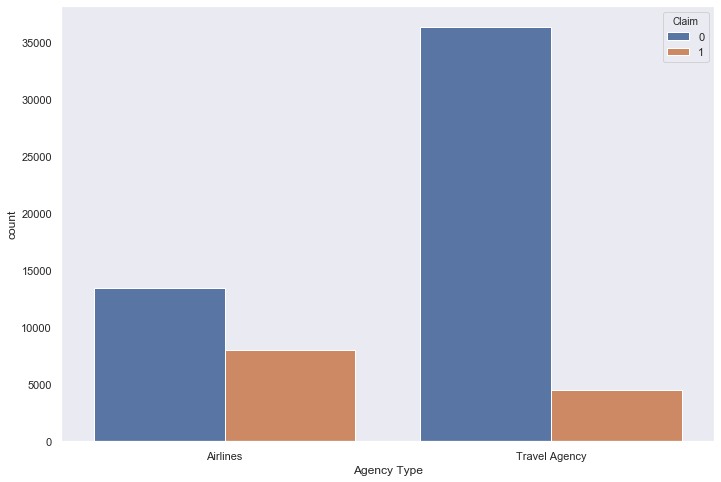

In [104]:
sns.countplot(x=claim['Agency Type'],hue=claim['Claim'])

# Inference
#Agency Type: Airlines has maximum number of claims

# Column :Net sales

Text(0.5, 1.0, 'Boxplot for  claim by Net Sales')

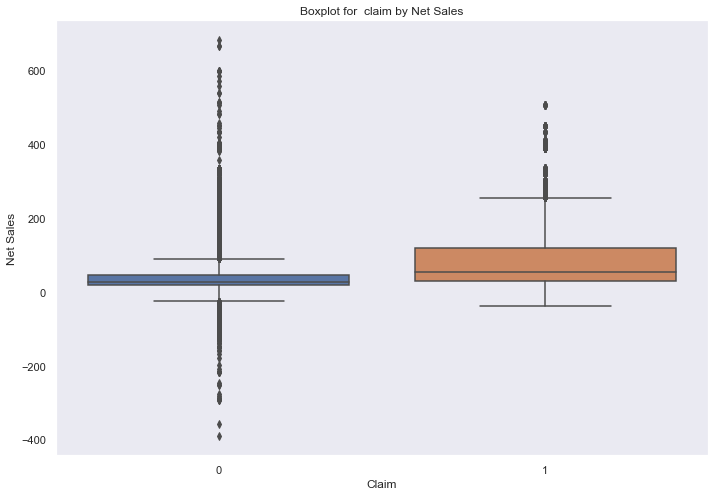

In [105]:
# creating box plot of Net sales & claim using seaborn
plt.subplot(1,1,1)
sns.boxplot(x=claim.Claim,y=claim['Net Sales'])
plt.title("Boxplot for  claim by Net Sales")

In [106]:
pd.crosstab(index=claim['Net Sales'],columns=claim['Claim'])

Claim,0,1
Net Sales,,
-389.00,1,0
-357.50,1,0
-291.75,3,0
-287.40,1,0
-287.10,1,0
-281.00,1,0
-277.20,1,0
-252.85,2,0
-247.50,1,0


In [47]:
claim['Net Sales'].max()

682.0

In [107]:
claim['Net Sales'].min()

-389.0

# Inference
#Net Sales is between -389 to 682
#it has outliers because if Net sales is in negative but claim is still 0

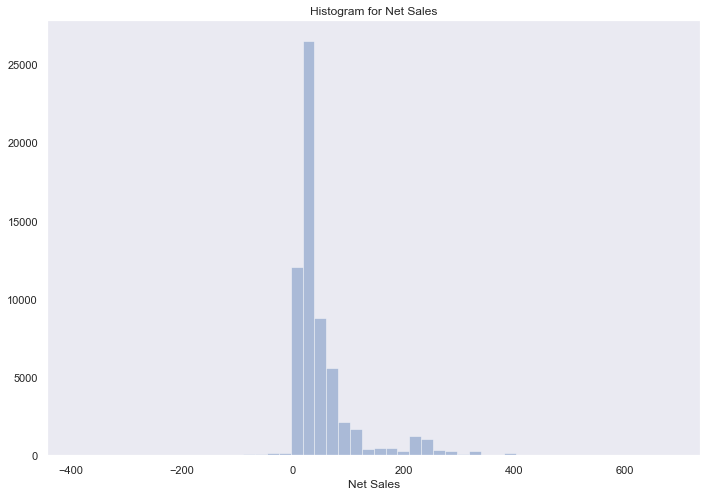

In [108]:
plt.title("Histogram for Net Sales")
sns.distplot(claim['Net Sales'],kde=False)

# Column:Distribution Channel

In [109]:
claim['Distribution Channel'].value_counts()

Online     61172
Offline     1116
Name: Distribution Channel, dtype: int64

In [110]:
pd.crosstab(index=claim['Distribution Channel'],columns=claim['Claim'])

Claim,0,1
Distribution Channel,,
Offline,874,242
Online,48956,12216


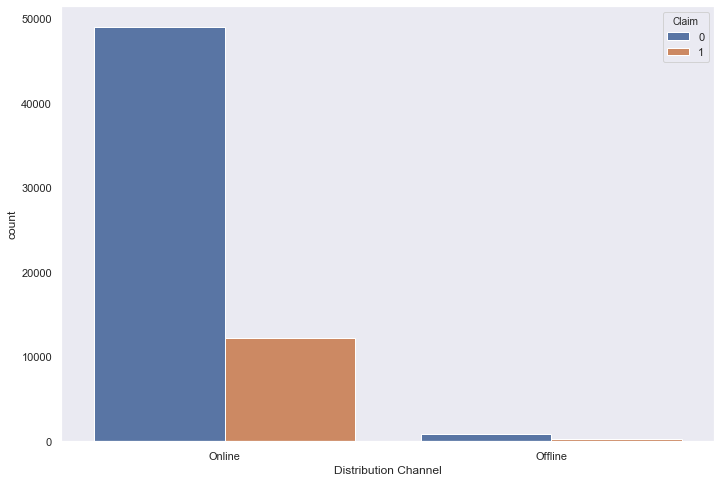

In [53]:
sns.countplot(x=claim['Distribution Channel'],hue=claim['Claim'])

# Inference:
#maximum number of travel plans has bought Online and claim are also more

# Column : Product name

In [111]:
claim['Product Name'].nunique()

25

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


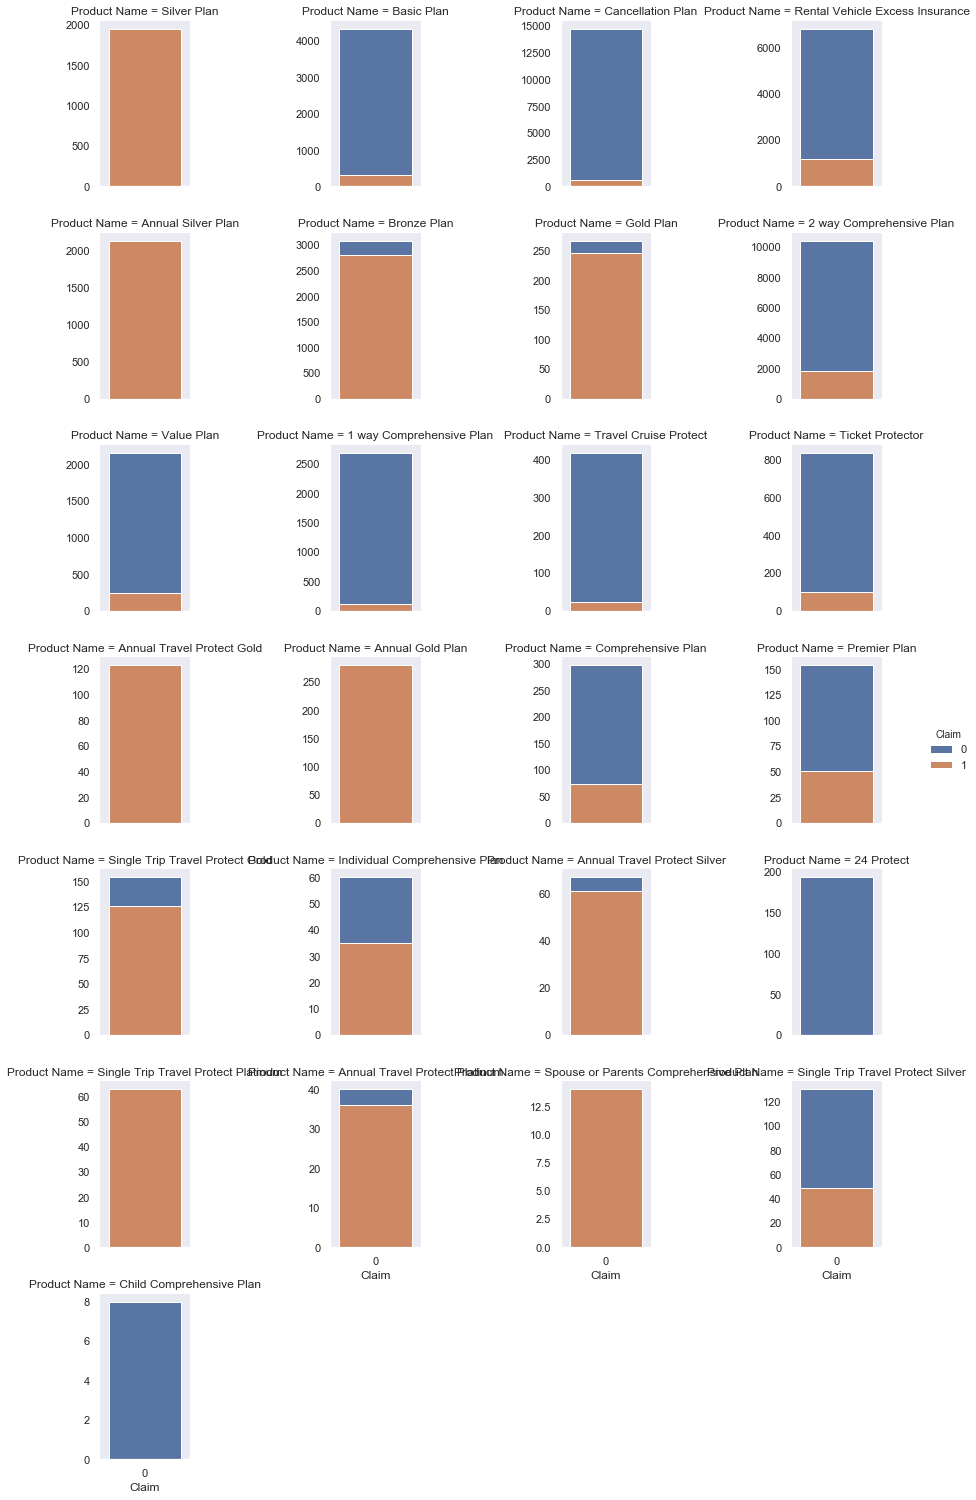

In [112]:
g = sns.FacetGrid(claim, col='Product Name', col_wrap=4, hue='Claim', sharey=False)
g.map(sns.countplot, 'Claim').add_legend()
#plt.suptitle('Defaulter ratio by branches', y=1.02, fontsize=15, color='blue')
plt.show()

In [113]:
pd.crosstab(index=claim['Product Name'],columns=claim['Claim'])

Claim,0,1
Product Name,,
1 way Comprehensive Plan,2688,119
2 way Comprehensive Plan,10409,1845
24 Protect,193,0
Annual Gold Plan,142,280
Annual Silver Plan,1011,2132
Annual Travel Protect Gold,75,123
Annual Travel Protect Platinum,40,36
Annual Travel Protect Silver,67,61
Basic Plan,4341,324


# Column:Destination

In [114]:
claim['Destination'].nunique()

102

In [115]:
pd.crosstab(index=claim['Destination'],columns=claim['Claim'])

Claim,0,1
Destination,,
ARGENTINA,15,12
AUSTRALIA,2940,543
AUSTRIA,81,0
AZERBAIJAN,6,0
BAHRAIN,10,0
BANGLADESH,75,0
BELARUS,2,0
BELGIUM,36,0
BERMUDA,3,0


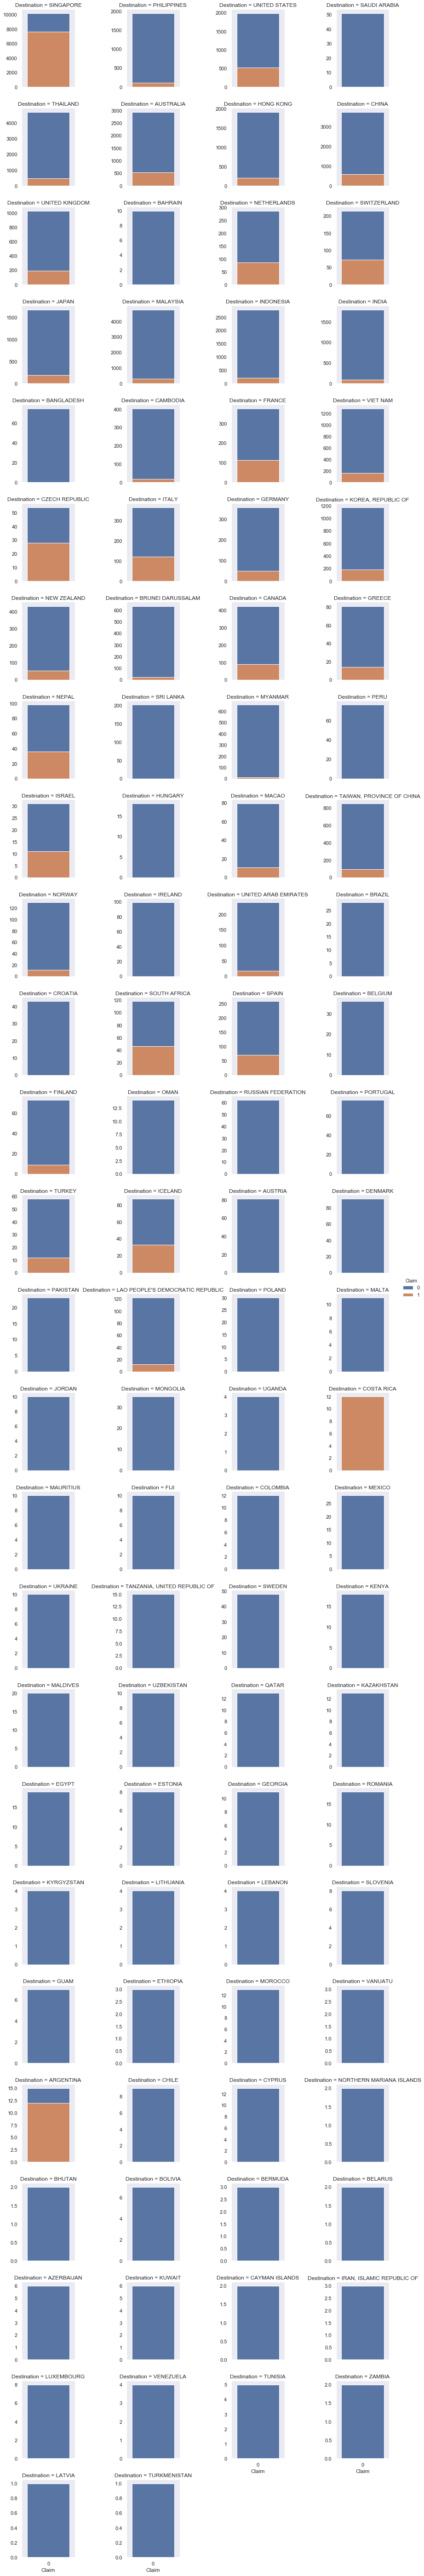

In [116]:
g = sns.FacetGrid(claim, col='Destination', col_wrap=4, hue='Claim', sharey=False)
g.map(sns.countplot, 'Claim').add_legend()
#plt.suptitle('Defaulter ratio by branches', y=1.02, fontsize=15, color='blue')
plt.show()

In [117]:
claim['Destination'].value_counts()

SINGAPORE                    17796
THAILAND                      5179
MALAYSIA                      5073
CHINA                         4346
AUSTRALIA                     3483
INDONESIA                     2988
UNITED STATES                 2508
HONG KONG                     2118
PHILIPPINES                   2051
INDIA                         1887
JAPAN                         1860
VIET NAM                      1441
KOREA, REPUBLIC OF            1358
UNITED KINGDOM                1221
TAIWAN, PROVINCE OF CHINA      941
MYANMAR                        671
BRUNEI DARUSSALAM              658
CANADA                         513
FRANCE                         491
ITALY                          488
NEW ZEALAND                    486
CAMBODIA                       423
GERMANY                        407
NETHERLANDS                    373
SPAIN                          329
SWITZERLAND                    288
UNITED ARAB EMIRATES           255
SRI LANKA                      201
SOUTH AFRICA        

# Column:Gender

In [118]:
claim['Gender'].value_counts()

F    11484
M    11229
Name: Gender, dtype: int64

In [119]:
pd.crosstab(index=claim['Gender'],columns=claim['Claim'])

Claim,0,1
Gender,,
F,6812,4672
M,7271,3958


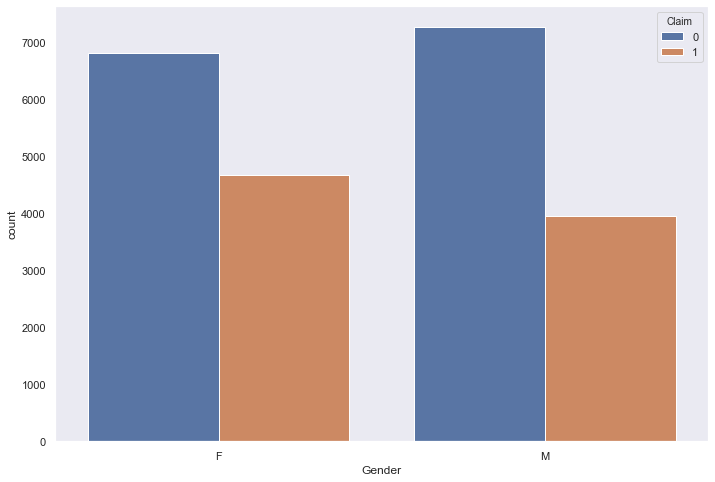

In [120]:
sns.countplot(x=claim['Gender'],hue=claim['Claim'])

# Inference:
#distribution between Male & Females are moreover same 
#No varaince is there

# PreProcessing the Data

#Dropping the ID & Gender columns
#OHE on Agency Type & Distribution Channel 
#Imputed Categorical columns : Agency, Destination & Product Name with Probabilites



In [121]:
claim.drop(['ID','Gender'],axis=1, inplace=True)

In [122]:
claim.columns

Index(['Age', 'Agency', 'Agency Type', 'Commision (in value)', 'Destination',
       'Distribution Channel', 'Duration', 'Net Sales', 'Product Name',
       'Claim'],
      dtype='object')

In [132]:
#Convert categorical to int

claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
Age                             62288 non-null int64
Agency                          62288 non-null float64
Commision (in value)            62288 non-null float64
Destination                     62288 non-null float64
Duration                        62288 non-null int64
Net Sales                       62288 non-null float64
Product Name                    62288 non-null float64
Claim                           62288 non-null int64
Agency Type_Airlines            62288 non-null uint8
Agency Type_Travel Agency       62288 non-null uint8
Distribution Channel_Offline    62288 non-null uint8
Distribution Channel_Online     62288 non-null uint8
dtypes: float64(5), int64(3), uint8(4)
memory usage: 4.0 MB


In [124]:
#Imputing on Destination :
b=claim['Destination'].value_counts()/claim['Destination'].value_counts().sum()
b=b.to_dict()
claim['Destination']= claim['Destination'].map(b)

In [125]:
#imputing on Product Name
c=claim['Product Name'].value_counts()/claim['Product Name'].value_counts().sum()
c=c.to_dict()
claim['Product Name']= claim['Product Name'].map(c)

In [126]:
#Imputing on AGENCY
d=claim['Agency'].value_counts()/claim['Agency'].value_counts().sum()
d=d.to_dict()
claim['Agency']= claim['Agency'].map(d)

In [127]:
claim2=claim1.copy()

In [128]:
claim= pd.get_dummies(claim, columns=['Agency Type','Distribution Channel'])

In [131]:
claim.columns

Index(['Age', 'Agency', 'Commision (in value)', 'Destination', 'Duration',
       'Net Sales', 'Product Name', 'Claim', 'Agency Type_Airlines',
       'Agency Type_Travel Agency', 'Distribution Channel_Offline',
       'Distribution Channel_Online'],
      dtype='object')

In [133]:
# all columns are in Numerical format:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62288 entries, 0 to 62287
Data columns (total 12 columns):
Age                             62288 non-null int64
Agency                          62288 non-null float64
Commision (in value)            62288 non-null float64
Destination                     62288 non-null float64
Duration                        62288 non-null int64
Net Sales                       62288 non-null float64
Product Name                    62288 non-null float64
Claim                           62288 non-null int64
Agency Type_Airlines            62288 non-null uint8
Agency Type_Travel Agency       62288 non-null uint8
Distribution Channel_Offline    62288 non-null uint8
Distribution Channel_Online     62288 non-null uint8
dtypes: float64(5), int64(3), uint8(4)
memory usage: 4.0 MB


# Baseline Model

# splitting data into Train & Test

In [134]:
X=claim.drop('Claim',axis=1)
y=claim['Claim']

In [135]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_log= round(precision_score(Y_test, Y_pred) * 100, 2)
F1_log = round(f1_score(Y_test,Y_pred)*100,2)
Recall_log = round(recall_score(Y_test,Y_pred)*100,2)

In [ ]:
Recall_log

In [ ]:
#Feature Preference given by Logistic Regression
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

# SVM

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_svc = round(recall_score(Y_test,Y_pred)*100,2)

# KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(Y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(Y_test,Y_pred)*100,2)

# Gaussian Naive Bayes

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(Y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(Y_test,Y_pred)*100,2)

# Perceptron

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_perceptron=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_perceptron = round(f1_score(Y_test,Y_pred)*100,2)
Recall_perceptron = round(recall_score(Y_test,Y_pred)*100,2)

## Linear SVC

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_linear_svc=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_linear_svc = round(f1_score(Y_test,Y_pred)*100,2)
Recall_linear_svc = round(recall_score(Y_test,Y_pred)*100,2)

## Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_sgd=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_sgd = round(f1_score(Y_test,Y_pred)*100,2)
Recall_sgd = round(recall_score(Y_test,Y_pred)*100,2)

## Decision Tree

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(Y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(Y_test,Y_pred)*100,2)

## KFOLD

In [ ]:
#kfold
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')

## KFOLD on Random Forest

In [ ]:
# KFOLD on Random Forest
scores = []
for i in range(12):
    result = next(kf.split(x), None)
    x_train = x.iloc[result[0]]
    x_test = x.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(x_train,y_train)
    predictions = rf_reg.predict(x_test)
    scores.append(model.score(x_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

In [ ]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

## Random Forest

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(Y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(Y_test,Y_pred)*100,2)

In [ ]:
test_pred_rf = random_forest.predict(test_data)

# Voting Classifier

In [ ]:
clf1 = LogisticRegression(solver='lbfgs', multi_class='multinomial',random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [ ]:
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_train, Y_train)
Y_pred=eclf1.predict(X_test)
acc_Voting_class = round(accuracy_score(Y_test, Y_pred) * 100, 2)
prec_Voting_class=round(precision_score(Y_test, Y_pred) * 100, 2)
F1_Voting_class = round(f1_score(Y_test,Y_pred)*100,2)
Recall_Voting_class = round(recall_score(Y_test,Y_pred)*100,2)

## XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
model_xgb=XGBClassifier()
model_xgb.fit(X_train,y_train)
y_pred_xgb=model_xgb.predict(X_test)

## AdaBoost Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
model_ada=AdaBoostClassifier()
model_ada.fit(X_train,y_train)
y_pred_ada=model_ada.predict(X_test)

## Kera 

In [ ]:
pip install Tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

# Final Data Frame containing model selection accuracy values

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','K_fold_RF','VotingClassifier','XGB','Adaboost'],
    'Acc_Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_kfold_rf,acc_Voting_class,acc_xgb,acc_ada],
    'Precision':[prec_svc, prec_knn, prec_log, 
              prec_random_forest, prec_guassian, prec_perceptron, 
              prec_sgd, prec_linear_svc, prec_decision_tree,prec_kfold_rf,prec_Voting_class,prec_xgb,prec_ada],
    'Recall':[Recall_svc, Recall_knn, Recall_log, 
              Recall_random_forest, Recall_guassian, Recall_perceptron, 
              Recall_sgd, Recall_linear_svc, Recall_decision_tree,Recall_kfold_rf,Recall_Voting_class,Recall_xgb,Recall_ada],
    'F1':[F1_svc, F1_knn, F1_log, F1_random_forest, F1_guassian, F1_perceptron, 
              F1_sgd, F1_linear_svc, F1_decision_tree,F1_kfold_rf,F1_Voting_class,F1_xgb,F1_ada]})
models.sort_values(by='Acc_Score', ascending=False)

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

In [ ]:
importances.plot.bar()

## Selecting Random Forest based upon Accuracy Score

# Testing on Sample submission file

In [136]:
# Test data

claim_data_test=pd.read_csv("/Users/shilpyjain/Downloads/file/Test_file.csv")

In [137]:
claim_1=claim_data_test.copy()

In [138]:
# Drop all  ID & Gender columns

claim_1.drop(['ID','Gender'],axis=1, inplace=True)

In [139]:
# Destination

b=claim_1['Destination'].value_counts()/claim_1['Destination'].value_counts().sum()
b=b.to_dict()
claim_1['Destination']= claim_1['Destination'].map(b)

In [140]:
c=claim_1['Product Name'].value_counts()/claim_1['Product Name'].value_counts().sum()
c=c.to_dict()
claim_1['Product Name']= claim_1['Product Name'].map(c)

In [141]:
c=claim_1['Agency'].value_counts()/claim_1['Agency'].value_counts().sum()
c=c.to_dict()
claim_1['Agency']= claim_1['Agency'].map(c)

In [142]:
claim_1= pd.get_dummies(claim_1, columns=['Agency Type','Distribution Channel'])

In [143]:
claim_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15572 entries, 0 to 15571
Data columns (total 11 columns):
Age                             15572 non-null int64
Agency                          15572 non-null float64
Commision (in value)            15572 non-null float64
Destination                     15572 non-null float64
Duration                        15572 non-null int64
Net Sales                       15572 non-null float64
Product Name                    15572 non-null float64
Agency Type_Airlines            15572 non-null uint8
Agency Type_Travel Agency       15572 non-null uint8
Distribution Channel_Offline    15572 non-null uint8
Distribution Channel_Online     15572 non-null uint8
dtypes: float64(5), int64(2), uint8(4)
memory usage: 912.5 KB


# Final Application of Random Forest algo on test data

In [ ]:
model_log2_pred= rf_reg.predict(claim_1)

In [ ]:
sub_csv_RF = pd.read_csv("/Users/shilpyjain/Downloads/file/sample_submission.csv")

In [ ]:
sub_csv_RF['Claim'] = y_pred

In [ ]:
sub_csv_RF.to_csv('sub_csv_RF.csv',index=False)